In [122]:
#step 1 import required packages
import pandas as pd # load pandas package for importing csv files in correct format
# import as defines the identifier you want to use for the function e.g in this case 
# pd will call the pandas package
import matplotlib # load matplotlib package for plotting graphs
import os
import matplotlib.pyplot as plt #import matplotlib.pyplot package for plotting boxplots

In [24]:
def import_OP_data(filename):
    'This function imports an csv file downloaded from the Open Prescribing website into a dataframe for analysis in Python'
    data = pd.read_csv(filename, sep=',')#load OP data to filter out a subset for testing all scripts
    dataframe = pd.DataFrame(data) #Convert imported data to a dataframe using pandas
    return print('These are the first 3 rows of the dataset. Does it look correct?',
                 dataframe.head(3)) #view the first three lines of the dataframe to check import has been successful

In [25]:
import_OP_data('measures.csv')

These are the first 3 rows of the dataset. Does it look correct?             measure  org_type  org_id                                org_name  \
0  ktt9_antibiotics  practice  P84650                  THE ALEXANDRA PRACTICE   
1  ktt9_antibiotics  practice  P84673  ANCOATS URBAN VILLAGE MEDICAL PRACTICE   
2  ktt9_antibiotics  practice  P84071                       WILBRAHAM SURGERY   

         date  numerator  denominator  calc_value  percentile  
0  2014-10-01      199.0  3106.653507    0.064056    9.181078  
1  2014-10-01      463.0  4252.799604    0.108869   75.864700  
2  2014-10-01      219.0  2275.856965    0.096227   57.540692  


In [51]:
def remove_OP_artifacts(dataframe):
    'This function removes rows with zero prescripitoons from the dataset'
    dataframe_Sort = dataframe.sort_values("numerator")#sort dataframe based on number of prescriptions
    PCo = len(dataframe_Sort[dataframe_Sort['numerator'] == 0.0]) #count number of rows with 0 prescriptions
    AntiP =  dataframe_Sort['numerator']>0.0 #Identify all rows with a prescription value greater than 0.0
    df_SF = dataframe_Sort[AntiP] #Filter the dataset, keeping all rows with prescriptions >0 (i.e. = 'TRUE')
    #First values of prescripitions in dataset = 1.0
    #Rows with values of 0 have been filtered correctly
    #Antibiotics per 1000. Values =0.0 = <1 prescription per 1000 people? Check openprescribing.net description?
    #Check all rows with 0 prescriptions have been removed
    df_SF_min = min(df_SF.numerator) # check minimum value is not 0.0
    if PCo>0: #Create an if statement to interpret the presence of rows with 0 prescriptions
        return print('This dataset contains', PCo, 
                  'entries with 0 prescriptions. These entries have been removed from the dataset.', 
                  'The smallest number of prescriptions is:', df_SF_min, 'per 1000 patients')
                    #print warning meassage to user outlining the number of blank rows detected using an if statement 
    else:
        return print('This dataset contains', PCo, 
          'entries with 0 prescriptions. No entries have been removed from the dataset. The smallest number of prescriptions is:',
                 PCo) #Notify the user if no rows were found with zero prescriptions

In [55]:
remove_OP_artifacts(dataframe)

This dataset contains 345 entries with 0 prescriptions. These entries have been removed from the dataset. The smallest number of prescriptions is: 1.0 per 1000 patients


In [120]:
def remove_OP_IQRoutliers(dataframe):
    'This script identifies outliers within the dataset, based on IQR criteria'
    dataframe_Sort = dataframe.sort_values("numerator")#sort dataframe based on number of prescriptions
    AntiP =  dataframe_Sort['numerator']>0.0 #Identify all rows with a prescription value greater than 0.0
    df_SF = dataframe_Sort[AntiP]
    #Calculate IQR
    q1 = df_SF['numerator'].quantile(0.25)#Q1
    q3 = df_SF['numerator'].quantile(0.75)#Q3
    iqr = df_SF['numerator'].quantile(0.75)-df_SF['numerator'].quantile(0.25) #calculate IQR
    #Calclate lower limit for outliers
    LowOut = q1 - 1.5 * iqr #lower bound
    #Calculate upper limit for outliers
    HighOut = q3 + 1.5 * iqr #upper bound
    # Identify all rows with high and low outliers 
    Outliers = df_SF[(df_SF['numerator'] < LowOut) | (df_SF['numerator'] > HighOut)] #pipe (|) = OR
    #count number of outliers and print message to inform the user
    NoOutliers = len(Outliers['numerator'])
    plt.boxplot(Outliers.numerator) #plot boxplot for outliers...
    GPlist=Outliers.org_name.unique() # list unique name of practices with prescription outliers.
    #This list of names can be used to plot trends i.e. the graphical functions developed below.
    return print("The interquartile range:", iqr, '\nThe lower boundary for outliers is:', LowOut, 
                 '\nThe upper boundary for outliers is:', HighOut, '\nThis dataset contains', NoOutliers, 
                 'Outliers, represented by the circles in the boxplot below.', 
                 '\nThis is a list of all the GP practices where antibioitc prescrition numbers have been identified as outliers:\n', GPlist)
    plt.show() 

The interquartile range: 219.0 
The lower boundary for outliers is: -151.5 
The upper boundary for outliers is: 724.5 
This dataset contains 154 Outliers, represented by the circles in the boxplot below. 
This is a list of all the GP practices where antibioitc prescrition numbers have been identified as outliers:
 ['BOWLAND MEDICAL PRACTICE' 'BENCHILL MEDICAL PRACTICE'
 'THE AVENUE MEDICAL CENTRE' 'VALENTINE MEDICAL CENTRE'
 'NEW COLLEGIATE MEDICAL CENTRE' "ST GEORGE'S MEDICAL CENTRE"
 'GORTON MEDICAL CENTRE' 'DIDSBURY MEDICAL CENTRE - DR WHITAKER'
 'NORTHENDEN GROUP PRACTICE' 'BODEY MEDICAL CENTRE'
 'PEEL HALL MEDICAL CENTRE' 'THE ROBERT DARBISHIRE PRACTICE'
 'CITY HEALTH CENTRE']


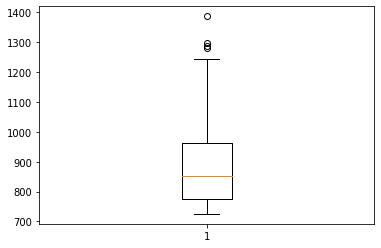

In [121]:
remove_OP_IQRoutliers(dataframe)